# Project Correction

## Set up

In [1991]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1992]:
sns.set_theme()

In [1993]:
# Load data
file_path = "masse-salariale-et-assiette-chomage-partiel-mensuelles-du-secteur-prive_modif.csv"
df = pd.read_csv(file_path, sep=';')

In [1994]:
df.head(10)

,dernier_jour_du_mois,masse_salariale_brute,glissement_annuel_masse_salariale,assiette_chomage_partiel,part_assiette_chomage_partiel
0,2018-07-31,4.751144e+10,3.597676,45469769,0.095611
1,2018-12-31,4.600000e+00,3.319051,55729461,0.099413
2,2019-02-28,4.650688e+10,3.031088,0,0.127574
3,2019-12-31,4.600000e+00,1.949395,56070642,0.098110
4,2020-05-31,4.600000e+00,-18.501244,0,11.315531
5,2020-06-30,4.811677e+10,-7.287336,2664957719,5.247868
6,2021-01-31,4.734466e+10,-2.672570,0,2.867120
7,2021-08-31,4.883181e+10,6.042091,0,0.621394
8,2021-11-30,5.457379e+10,11.471635,244436167,0.445903
9,2021-12-31,4.600000e+00,8.992572,242404559,0.402537


In [1995]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   dernier_jour_du_mois               50 non-null     object 
 1   masse_salariale_brute              49 non-null     float64
 2   glissement_annuel_masse_salariale  49 non-null     float64
 3   assiette_chomage_partiel           50 non-null     int64  
 4   part_assiette_chomage_partiel      50 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


In [1996]:
# Cast date_col as datetime and sort
date_col = 'dernier_jour_du_mois'
df.index = pd.to_datetime(df[date_col])
df.drop(columns=date_col, inplace=True)
df.sort_index(inplace=True)
df.head()

,masse_salariale_brute,glissement_annuel_masse_salariale,assiette_chomage_partiel,part_assiette_chomage_partiel
dernier_jour_du_mois,,,,
2018-01-31,4.597808e+10,3.723658,65170920,0.141543
2018-02-28,4.513869e+10,3.382396,0,0.205704
2018-03-31,5.010227e+10,3.528660,0,0.154912
2018-04-30,4.759058e+10,4.056714,0,0.108859
2018-05-31,NaN,3.132336,0,0.105381


In [1997]:
df.describe()

,masse_salariale_brute,glissement_annuel_masse_salariale,assiette_chomage_partiel,part_assiette_chomage_partiel
count,4.900000e+01,49.000000,5.000000e+01,50.000000
mean,5.114800e+10,3.229442,4.176503e+08,1.524333
std,6.772884e+10,8.318310,1.138796e+09,2.890538
min,4.600000e+00,-24.649473,0.000000e+00,0.085523
25%,4.665402e+10,1.949395,0.000000e+00,0.105487
50%,4.809593e+10,3.528660,0.000000e+00,0.180308
75%,5.037861e+10,6.042091,2.250646e+08,1.889728
max,5.000000e+11,30.548969,6.864317e+09,15.576859


## Analysis

### Visualize time series

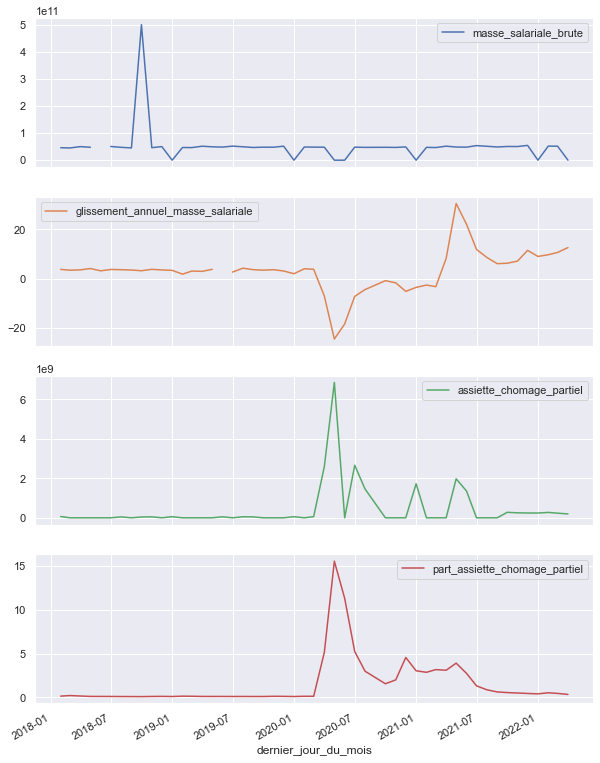

In [1998]:
df.plot(subplots=True, figsize=(10, 14))
None

- We can see there is a sort of missing data somewhere, we'll handle that in a few moments
- Also values of *masse_salariale_brute* close to zero seem wrong and should rather be around 1e10 numbers

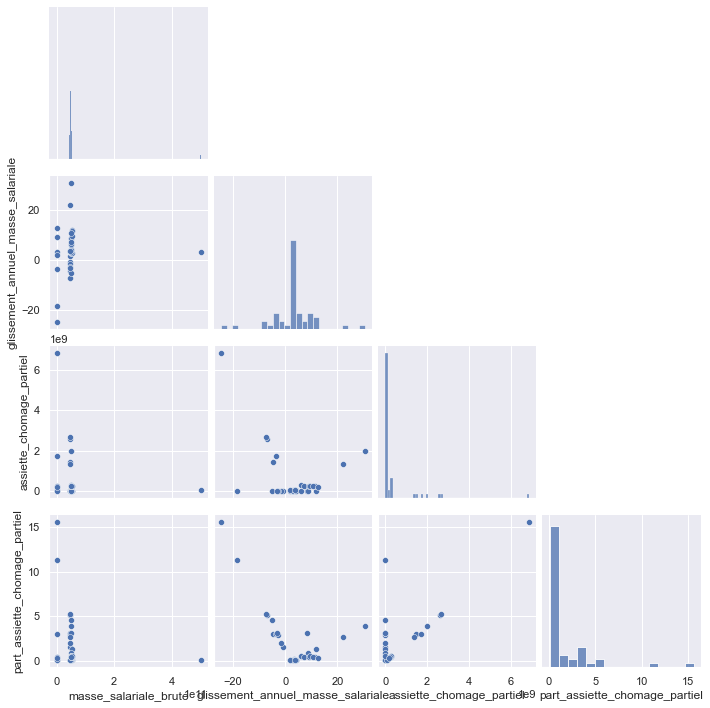

In [1999]:
sns.pairplot(df, corner=True)

Analysis:
- Potential presence of outlier in *masse_salariale_brute*, since many points crushed on the left side should not exist (can't be from 1e10 one month, then close to zero the next month)
- *glissement_annuel_masse_salariale* might be the variable closest to a normal law (but still far) - logical since the name suggests it has been computed as the evolution (often close to a normal law, see returns in finance, compared to their raw price)
- *part_assiette_chomage_partiel* and *assiette_chomage_partiel* show a positive linear relation (when one grows, the other grows too)

### Correlations
Pearson

<AxesSubplot:>

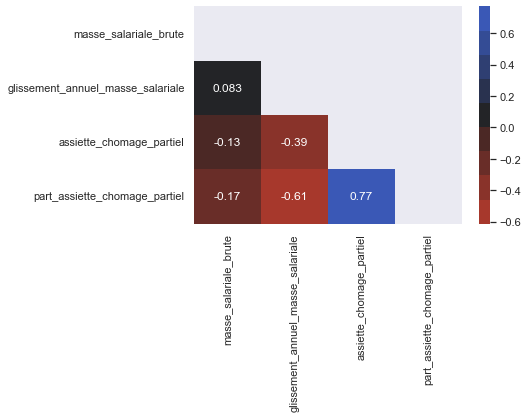

In [2000]:
colormap = sns.diverging_palette(15, 260, s=75, l=40, n=9, center="dark")
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap=colormap, annot=True, mask=mask)

In [2001]:
# TODO: resume here

Analysis:
- All the features but *masses_salariale_brute* are highly correlated
- Thus, many information is redundant, only a single variable from those correlated above 50% should be kept
- Since *part_assiette_chomage_partiel* is the most correlated with *glissement_annuel_masse_salariale* and *assiette_chomage_partiel*, it is the variable that contains the most information. Hence will be kept while others will be deleted (in [Data Management](#data_management) section).

To go further:
- Use statistical tests to check the robustness of these results.
- They might otherwise be due to a sampling bias.

## Data Cleaning

### Check missing values

Find the missing date
- A row will be imputed (through linear interpolation)

In [2002]:
# Check number of occurences for each year
df.index.year.value_counts()

2018    12
2019    12
2021    12
2020    11
2022     3
Name: dernier_jour_du_mois, dtype: int64

In [2003]:
# Find the missing date in 2020
mask_2020 = df.index.year == 2020
[month for month in range(1, 13) if not month in df[mask_2020].index.month]

[8]

- The missing row is at 2020-08-31 (31 days in august)
- Will have to reconstruct using interpolation (mean between previous and next rows)

In [2004]:
# Interpolate the missing row
interpolate_2020_08 = ((df.loc['2020-09-30'] + df.loc['2020-07-31']) / 2)
interpolate_2020_08 = pd.DataFrame(data=[interpolate_2020_08.values], columns=interpolate_2020_08.index, index=['2020-08-31'])
interpolate_2020_08.index = pd.to_datetime(interpolate_2020_08.index)
df = pd.concat([df, interpolate_2020_08])
df.sort_index(inplace=True)

In [2005]:
# Check the right execution of intended imputation
df.loc[['2020-09-30', '2020-08-31', '2020-07-31']]

,masse_salariale_brute,glissement_annuel_masse_salariale,assiette_chomage_partiel,part_assiette_chomage_partiel
2020-09-30,4.761950e+10,-0.870150,0.000000e+00,1.557461
2020-08-31,4.744790e+10,-2.690735,7.286845e+08,2.273969
2020-07-31,4.727629e+10,-4.511321,1.457369e+09,2.990477


### Check for NAs

In [2006]:
df.isna().sum()

masse_salariale_brute                1
glissement_annuel_masse_salariale    1
assiette_chomage_partiel             0
part_assiette_chomage_partiel        0
dtype: int64

In [2007]:
# Easy imputation of NaN:
# - coherent since there is a single NaN in the two columns
# - coherent since the values seem to have a linear relation
# - Use bfill as it prevents the risk of data leakage (using future values for imputation of past values)
df.fillna(method='bfill', inplace=True)

To go further:
- Variables can be used to impute the missing value in *masse_salariale_brute*, with a linear or non-linear imputer

### Detect outliers

#### Automatic outliers detection

- In a times series problem, it is not possible to delete the entire row
- Let's replace all the detected outliers by the expected min / max
- You can spend more time to assess more precisely which values should be kept

In [2008]:
# Create a function to automate this systematic work
def get_outliers(df, feature, margin=1.5, method='iqr', replace=False, verbose=True):
    """
    Detect outliers using either the IQR (interquartile range) method
    Less sensible to very large outliers, or the standard deviation method

    args:
        method: iqr (default) or std
    """
    # Define boundaries
    df_feat = df[feature]

    if method=='iqr':
        iqr = df_feat.quantile(.75) - df_feat.quantile(.25)
        bound_max = df_feat.median() + iqr * margin
        bound_min = df_feat.median() - iqr * margin
    elif method=='std':
        bound_max = df_feat.mean() + df_feat.std() * margin
        bound_min = df_feat.mean() - df_feat.std() * margin
    else:
        raise NameError

    # Detect outliers with masks
    is_above = df_feat > bound_max
    is_below = df_feat < bound_min
    mask_outliers_array = is_above | is_below
    
    # Extract outliers
    outliers = df[mask_outliers_array]

    # Replace by corresponding min, max value
    if replace:
        df.loc[is_below, feature] = bound_min
        df.loc[is_above, feature] = bound_max

    if verbose:
        print(f'min bound: {bound_min}')
        print(f'max bound: {bound_max}')
        print(f'Outliers :\n'
              f'{outliers[feature]}\n')

    return outliers, bound_min, bound_max

Feature: masse_salariale_brute

In [2009]:
for feature in df:
    get_outliers(df, feature, replace=True)

min bound: 42463817242.0
max bound: 53728048180.0
Outliers :
2018-09-30    5.000000e+11
2018-12-31    4.600000e+00
2019-12-31    4.600000e+00
2020-04-30    4.600000e+00
2020-05-31    4.600000e+00
2020-12-31    4.600000e+00
2021-06-30    5.381706e+10
2021-11-30    5.457379e+10
2021-12-31    4.600000e+00
2022-03-31    4.600000e+00
Name: masse_salariale_brute, dtype: float64

min bound: -1.4083485245
max bound: 8.3871584059
Outliers :
2020-03-31    -7.157234
2020-04-30   -24.649473
2020-05-31   -18.501244
2020-06-30    -7.287336
2020-07-31    -4.511321
2020-08-31    -2.690735
2020-10-31    -1.773326
2020-11-30    -5.242580
2020-12-31    -3.618969
2021-01-31    -2.672570
2021-02-28    -3.318223
2021-04-30    30.548969
2021-05-31    22.097902
2021-06-30    11.846802
2021-07-31     8.579352
2021-11-30    11.471635
2021-12-31     8.992572
2022-01-31     9.679403
2022-02-28    10.624362
2022-03-31    12.603487
Name: glissement_annuel_masse_salariale, dtype: float64

min bound: -357726793.5
max

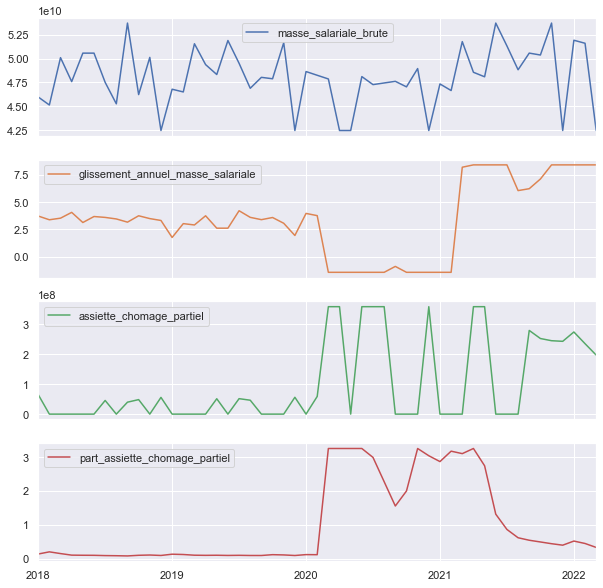

In [2010]:
# Check features deformation via graphs
df.plot(subplots=True, figsize=(10, 10))
None

- More fluctuations are now perceptible (mostly for *masse_salariale_brute*)

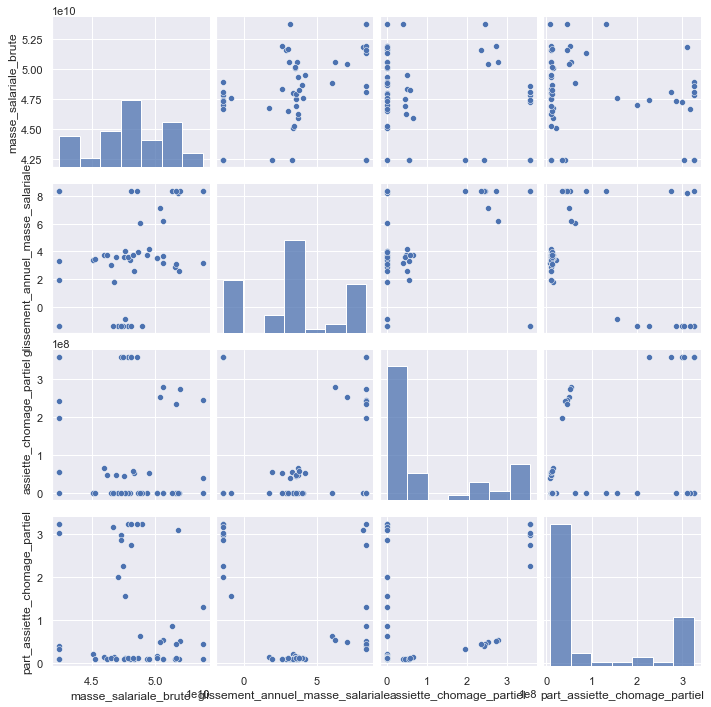

In [2011]:
sns.pairplot(df)
None

- Features are less contracted to the left
- Patterns start to be visible

<AxesSubplot:>

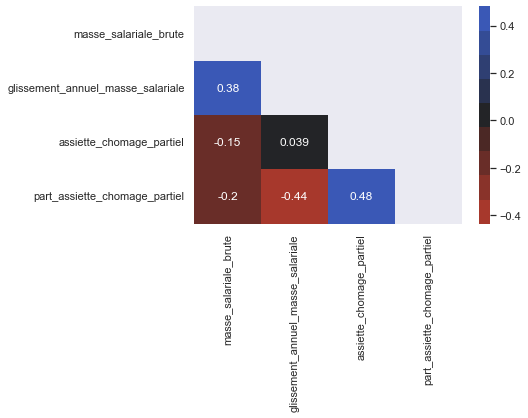

In [2012]:
# See impact on correlations
colormap = sns.diverging_palette(15, 260, s=75, l=40, n=9, center="dark")
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap=colormap, annot=True, mask=mask)

- The overall patterns are kept intact
- Some correlations decreased: mostly for the extreme correlation of 90%, now at 75%
- Some others increased: this could suggest that deleting the outliers enable to catch the patterns. This will most likely help the model.

To go further:
- The boundaries should be computed on the train set only, at the risk of data leakage otherwise
- This has been done on the whole dataset for simplification

## Data Management
<a id='data_management'></a>

### Drop features

Theory:
- The more correlated with the target the better:
    - since we keep the target variable
    - and we expect other variables to be greatly correlated with it as it will help predict the target
- The less correlated the features the better (between them - named multicolinearity):
    - Drop groups of features that are excessively correlated (>50%), keep only one feature in the group
    - Keep the features that contain the most information

In practice:
- *masse_salariale_brute* is our target variable. We won't delete it.
- Unfortunately other variables are not very correlated with it, thus it might be hard to predict the target
- *part_assiette_chomage_partiel* might contain the most information as it has the maximum of correlation with the other features
- Keep *part_assiette_chomage_partiel*, delete the other features.

In [2013]:
# Delete useless redundant information
df.drop(columns='assiette_chomage_partiel', inplace=True)

In [2014]:
# Delete features with excessive correlation ±60% (multi-colinearity)
# As the name suggests "glissement_annuel_masse_salariale",
# the variable might be derived directly from "masse_salariale_brute"
df.drop(columns='glissement_annuel_masse_salariale', inplace=True)

In [2015]:
df.head()

,masse_salariale_brute,part_assiette_chomage_partiel
2018-01-31,4.597808e+10,0.141543
2018-02-28,4.513869e+10,0.205704
2018-03-31,5.010227e+10,0.154912
2018-04-30,4.759058e+10,0.108859
2018-05-31,5.057610e+10,0.105381


We are left with 2 time series:
- the target *masse_salariale_brute*
- and 1 feature: *assiette_chomage_partiel*
- they are correlated at 26%

## Feature Engineering
The main goal of feature engineering is to help the model see patterns in the data (it is not as smart as you might expect)

Let's create feature is_year_end:
- 1 when month is november or december
- 0 otherwise

In [2016]:
mask_nov_dec = (df.index.month == 11) | (df.index.month == 12)
df['is_year_end'] = mask_nov_dec.astype(int)

In [2017]:
# Check it was correctly applied
df.iloc[7:14]

,masse_salariale_brute,part_assiette_chomage_partiel,is_year_end
2018-08-31,4.526136e+10,0.091683,0
2018-09-30,5.372805e+10,0.085523,0
2018-10-31,4.622974e+10,0.104400,0
2018-11-30,5.013033e+10,0.112381,1
2018-12-31,4.246382e+10,0.099413,1
2019-01-31,4.679120e+10,0.136573,0
2019-02-28,4.650688e+10,0.127574,0


### Normalize variables

In [2018]:
df = (df - df.mean())/df.std()

## Prediction
- Regression
- Time Series
- Predict the future

### Prepare data for time series prediction
- split train and test (70% train, 30% test)
- extract features (X) and target (y)
- shift features (this enables to find the link between old features values and current target values)

In [2064]:
# Train / Test Split
PCT_TRAIN = .70

last_train = int(df.shape[0] * PCT_TRAIN)
train = df.iloc[:last_train]
test = df.iloc[last_train:]

# For the plot only
train_index = train.index
test_index = test.index

In [2066]:
# Features vs Target (and shift)
TARGET = 'part_assiette_chomage_partiel'  # masse_salariale_brute
N_DELAY = 1  # months to predict ahead

X_train = train.shift(N_DELAY)  # use data n months before to predict today
X_train = X_train.iloc[N_DELAY:]
y_train = train[TARGET].iloc[N_DELAY:]
train_index = train_index[N_DELAY:]  # For the plot only

X_test = test.shift(N_DELAY)
X_test = X_test.iloc[N_DELAY:]
y_test = test[TARGET].iloc[N_DELAY:]
test_index = test_index[N_DELAY:]  # For the plot only

### Model
- Train
- Evaluate (test)
- Predict

In [2067]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2074]:
# Make a pipeline to automate transformation of the input
# On both train and test sets
DEGREE = 2
MODEL = 'ridge'  # lr, ridge
USE_POLY_FEATS = False  # True, False

if MODEL == 'lr':
    model = LinearRegression()
elif MODEL == 'ridge':
    model = Ridge(alpha=1)

if USE_POLY_FEATS:
    poly = PolynomialFeatures(DEGREE, include_bias=False)  # bias is handled next by LinearRegression
    pipeline = Pipeline(steps=[('t', poly), ('m', model)])
else:
    pipeline = Pipeline(steps=[('m', model)])

In [2075]:
# Train model
poly_reg_model = pipeline.fit(X_train, y_train)

# Evaluate model on train (predict on the train set)
y_train_pred = poly_reg_model.predict(X_train)
print(f'Train R^2: {poly_reg_model.score(X_train, y_train):.2f}')

# Evaluate model on test (predict on the test set)
y_test_pred = poly_reg_model.predict(X_test)
print(f'Test R^2: {poly_reg_model.score(X_test, y_test):.2f}')

Train R^2: 0.76
Test R^2: 0.88


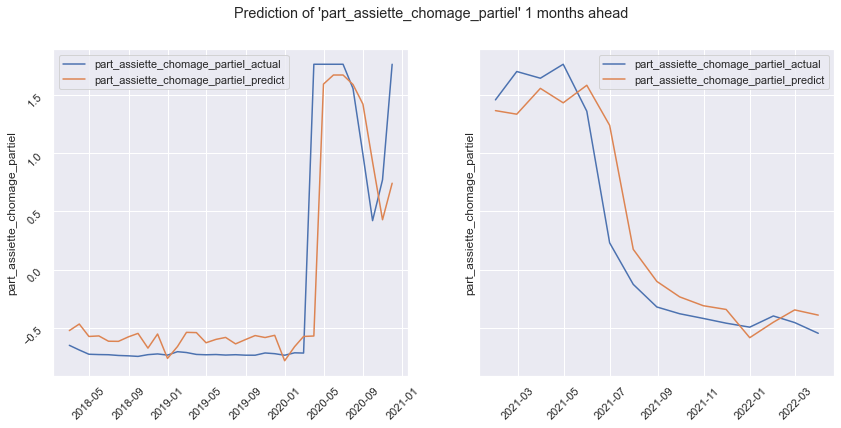

In [2076]:
# Define figure (whole white frame and space for each plot)
fig, ax = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Left plot (train)
ax[0].plot(train_index, y_train)
ax[0].plot(train_index, y_train_pred)
ax[0].tick_params(labelrotation=45)
ax[0].legend([f'{TARGET}_actual', f'{TARGET}_predict'])
ax[0].set_ylabel(TARGET)

# Right plot (train)
ax[1].plot(test_index, y_test)
ax[1].plot(test_index, y_test_pred)
ax[1].tick_params(labelrotation=45)
ax[1].legend([f'{TARGET}_actual', f'{TARGET}_predict'])
ax[1].set_ylabel(TARGET)

fig.suptitle(f"Prediction of '{TARGET}' {N_DELAY} months ahead")
plt.show()

The performance is quite poor using this model on these data. Still, appreciate the good prediction of one of the downward pics on test data.

Going further:
- try the model SARIMAX (can handle the seasonality easily)
- try the model XGBOOST
- Look for complementary data (very often this is more powerful than playing with models)